## Yield Curve Fitting Approach

In [12]:
import pandas as pd
from ECIRModel import ECIRModel
from CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [13]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model

#### Yield Curve Prediction

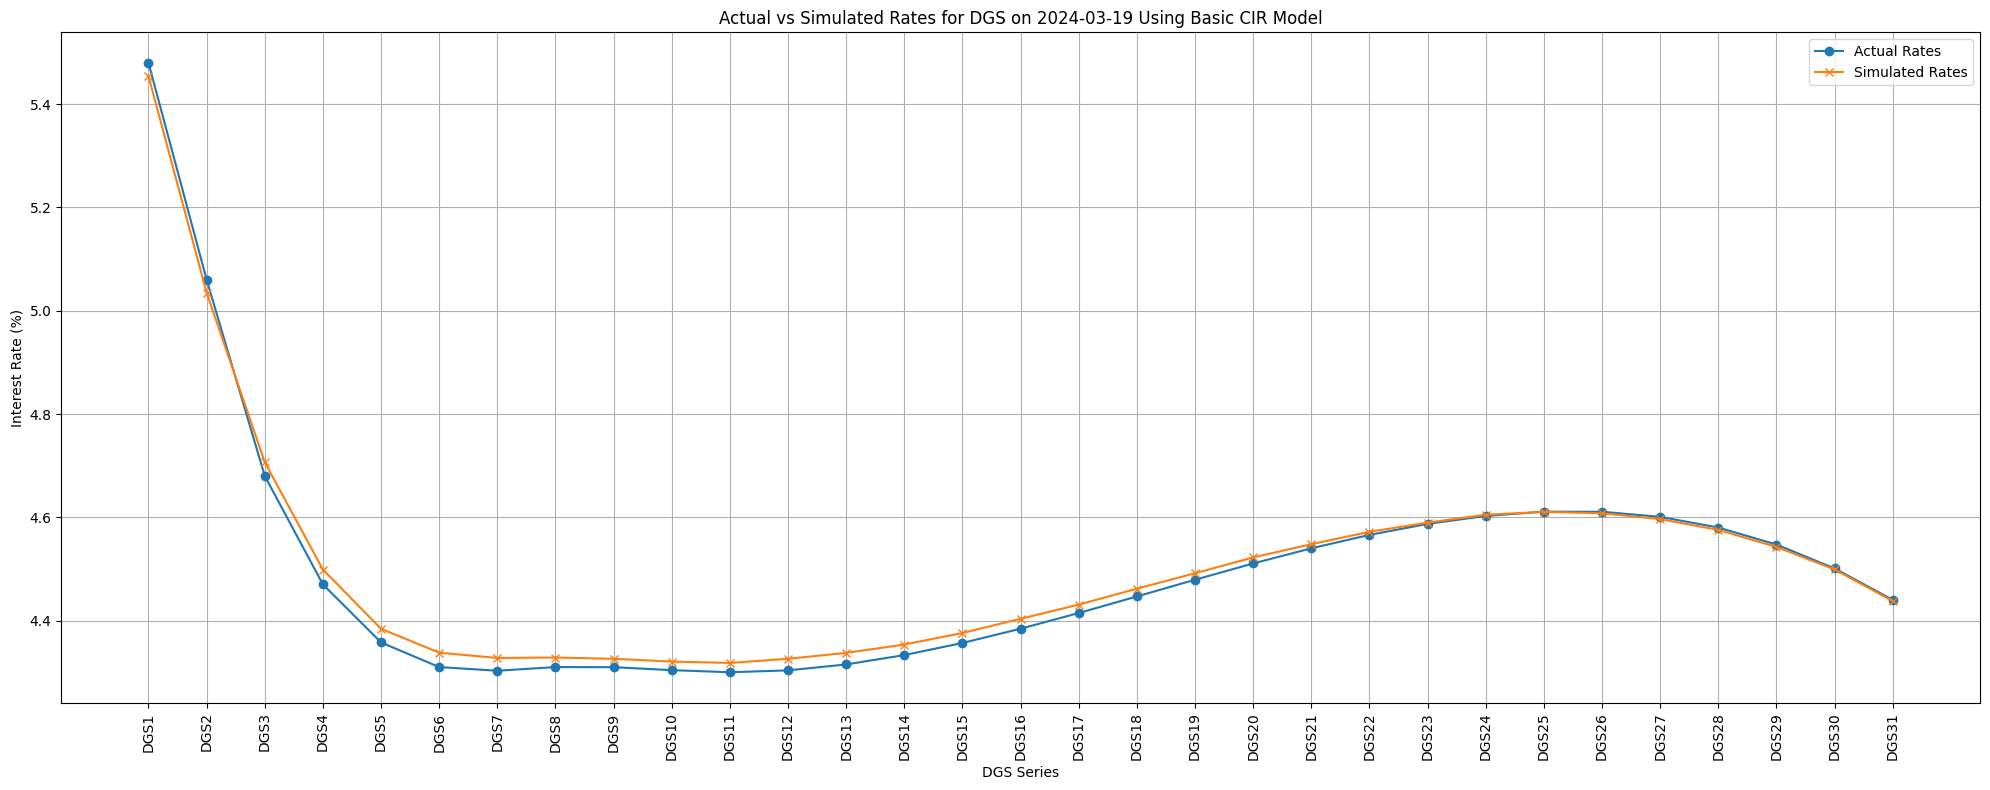

,Actual Rates,Simulated Rates
DGS3MO,5.480000,5.454132
DGS1,5.060000,5.034828
DGS2,4.680000,4.706438
DGS3,4.470000,4.498773
DGS4,4.357705,4.384114
DGS5,4.310000,4.337885
DGS6,4.302930,4.327684
DGS7,4.310000,4.328526
DGS8,4.309832,4.326020
DGS9,4.304042,4.320723


In [3]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparison_data_cir  

#### 
Bond Price Prediction

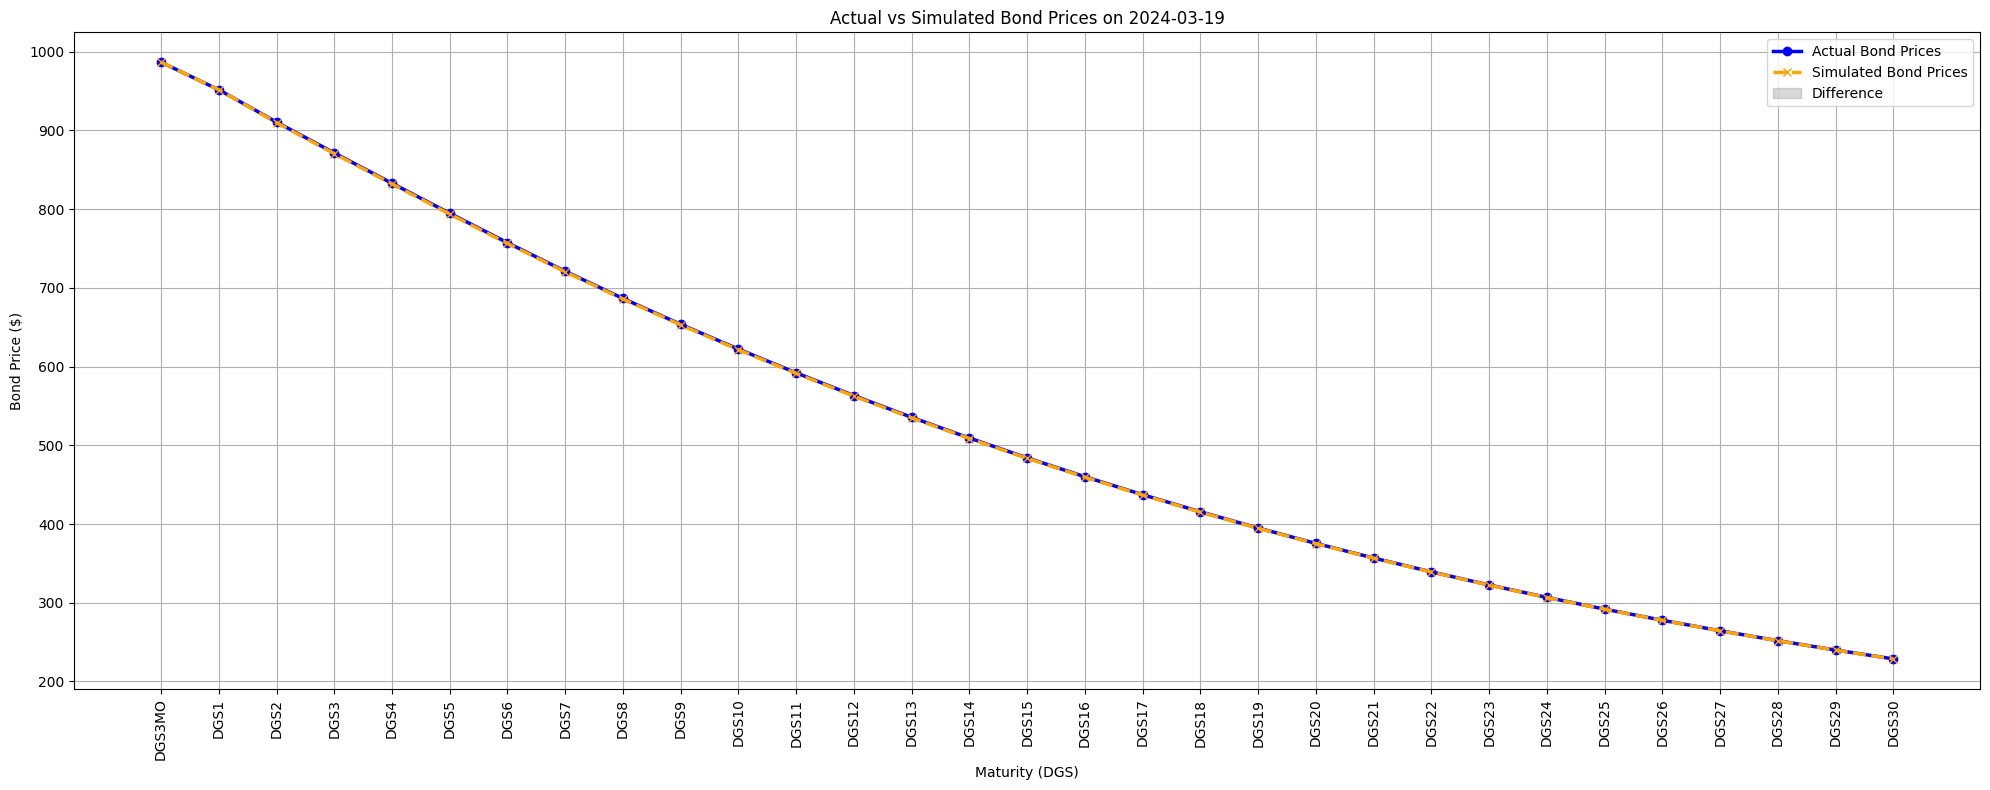

In [15]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)

# Function to calculate bond price using the CIR model for zero-coupon bonds
def calculate_bond_price_cir(model, rt, T, t=0):
    return model.bond_price(rt, T, t)

# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
                simulated_rate = model.next_rate(last_rate, 1/252)  
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                continuous_rate = nominal_to_continuous(simulated_rate)
                
                bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
                simulated_bond_prices[column] = bond_price
            except ValueError:
                continue
    return simulated_bond_prices


# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            try:
                last_nominal_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
                last_continuous_rate = nominal_to_continuous(last_nominal_rate)
                
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                
                # Calculate bond price using the continuous rate
                bond_price = calculate_bond_price_cir(basic_cir_model, last_continuous_rate, maturity) * face_value
                actual_bond_prices[column] = bond_price
            except ValueError:
                continue
    return actual_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices


# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})


# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,987.008875,987.038699
DGS1,953.304664,953.282012
DGS2,912.647689,912.444271
DGS3,873.326469,873.054159
DGS4,835.132555,834.890465
DGS5,798.205797,797.918933
DGS6,762.667283,762.372968
DGS7,728.629534,728.273619
DGS8,696.149351,695.951243
DGS9,665.145829,664.986366


### ECIR Model

#### Yield Rate Prediction

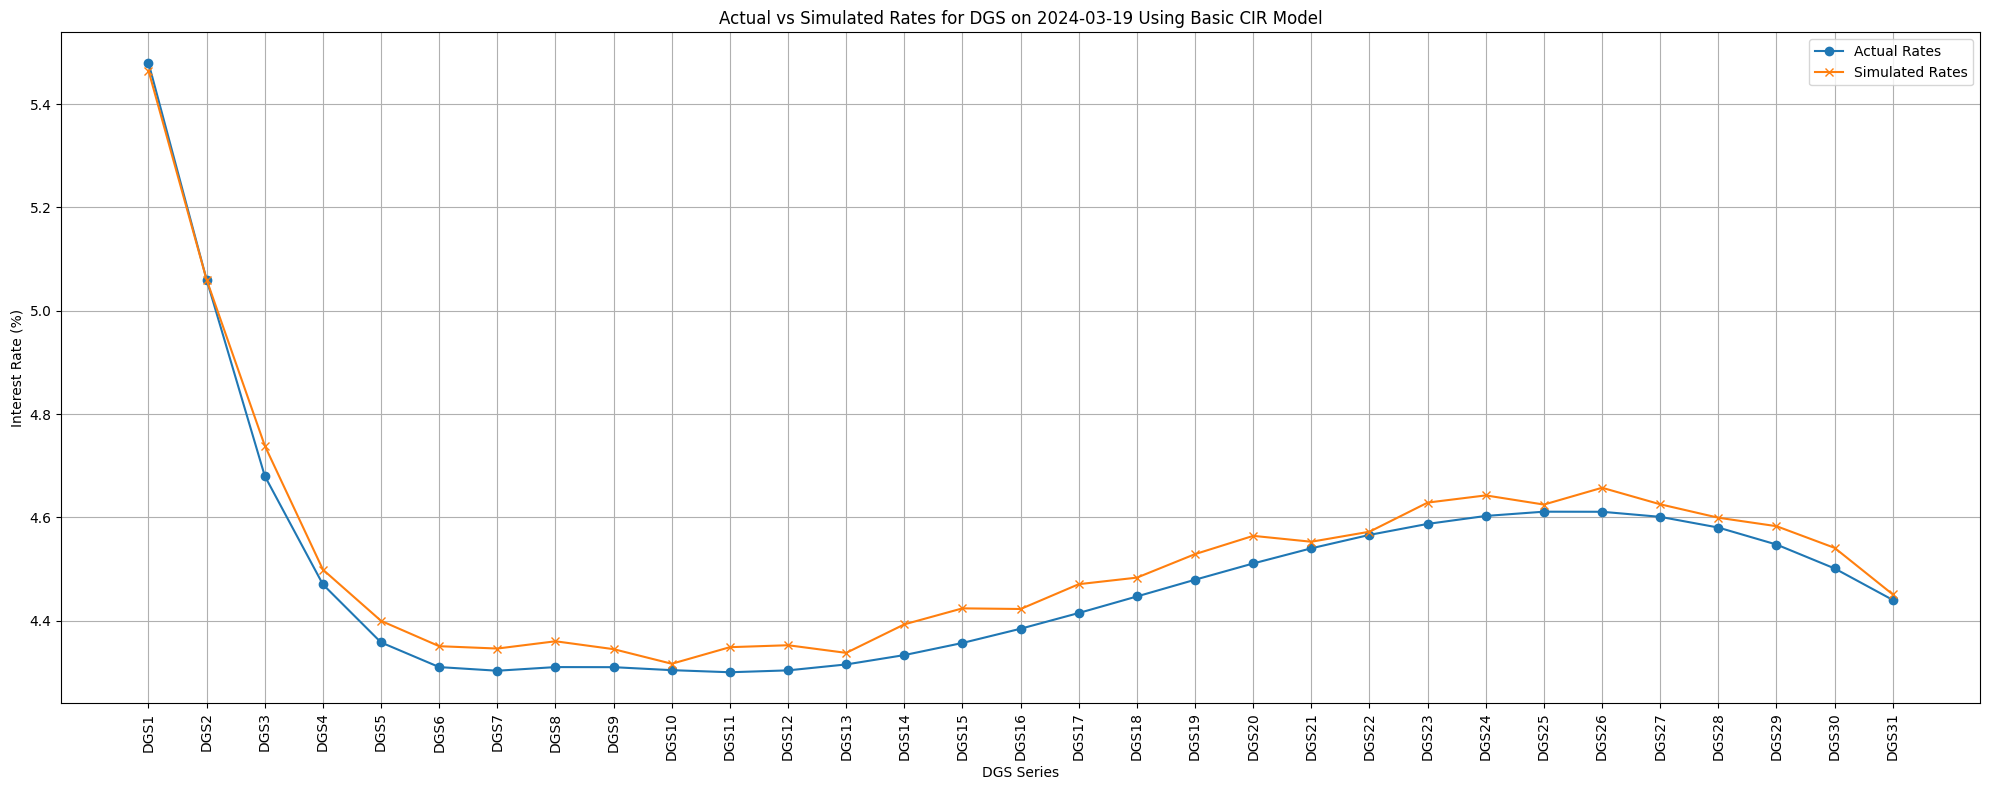

In [16]:
# Model parameters
params = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321,   
    "r": 66,             
    "p": 0.3049          
}

# Creating an instance of the ECIRModel
model = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-03-19')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model
        simulated_rates[column] = simulate_single_rate(model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})


comparison_data
# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-03-19 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bond Price Prediction

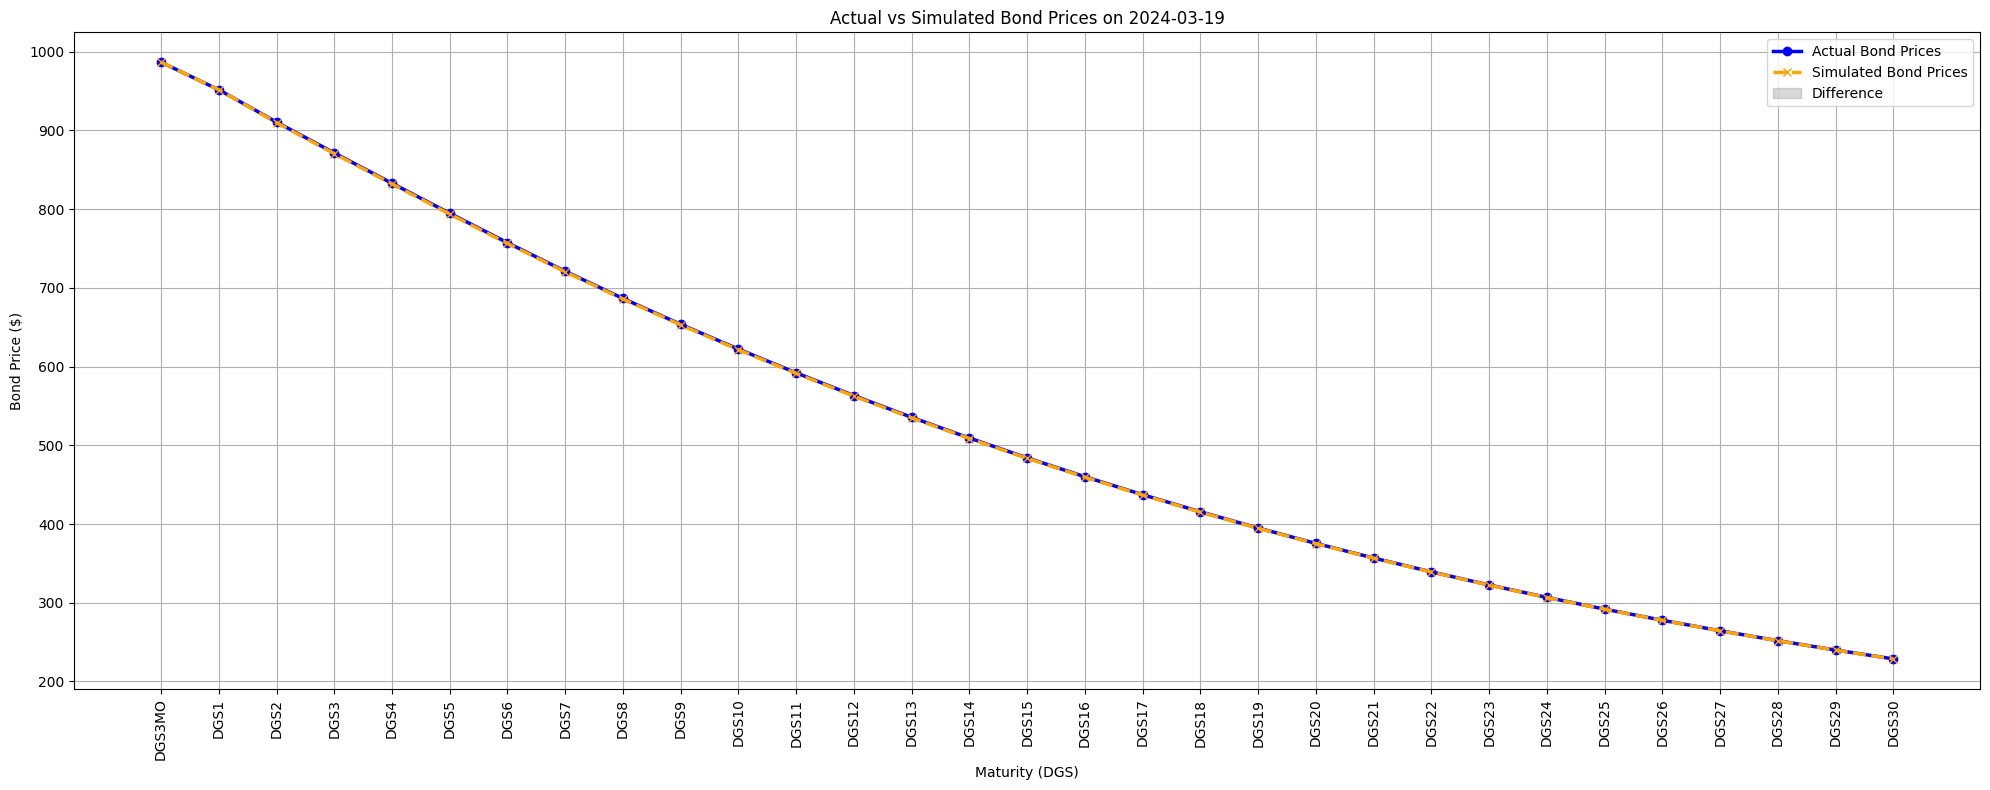

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the bond's face value
face_value = 1000  # The face value of the bond

# Function to convert nominal annual rate to continuous compounding rate
def nominal_to_continuous(nominal_rate):
    return np.log(1 + nominal_rate)


def calculate_bond_price_cir(model, rt, T, t=0):
    return model.bond_price(rt, T, t)

# Function to simulate bond prices
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1] / 100
            simulated_rate = model.next_rate(last_rate, 1/252)  # Simulating next rate
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            continuous_rate = nominal_to_continuous(simulated_rate)
            bond_price = calculate_bond_price_cir(model, continuous_rate, maturity) * face_value
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

# Function to calculate actual bond prices using market rates
def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            last_rate = data[column].loc[data.index <= simulation_date].iloc[-1] / 100
            continuous_rate = nominal_to_continuous(last_rate)
            maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
            bond_price = calculate_bond_price_cir(basic_cir_model, continuous_rate, maturity) * face_value
            actual_bond_prices[column] = bond_price
    return actual_bond_prices

# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-03-19')
ecir_model = ECIRModel(kappa=0.01227, mu_r=0.09854, sigma=0.09395,mu=0.002995,gamma=0.002321,r=66,p=0.3049 )  # Example model parameters

# Simulate bond prices
simulated_bond_prices2 = simulate_bond_prices(ecir_model, data, face_value, simulation_date)

# Calculate actual bond prices
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create DataFrames from the bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})

# Plotting both actual and simulated bond prices with enhanced visibility
plt.figure(figsize=(20, 8))

# Plot actual bond prices with a solid blue line and circle markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'],
         label='Actual Bond Prices', marker='o', linestyle='-', color='blue', linewidth=2.5)

# Plot simulated bond prices with a dashed orange line and x markers
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'],
         label='Simulated Bond Prices', marker='x', linestyle='--', color='orange', linewidth=2.5)

# Highlight the differences by plotting the differences
plt.fill_between(combined_bond_prices_df.index, 
                 combined_bond_prices_df['Actual Bond Prices'], 
                 combined_bond_prices_df['Simulated Bond Prices'], 
                 color='gray', alpha=0.3, label='Difference')

# Title and labels
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')

# Improve the x-axis labels readability
plt.xticks(rotation=90)

# Legend and grid
plt.legend()
plt.grid(True)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,986.781053,986.785018
DGS1,951.756868,951.748141
DGS2,910.670797,909.990923
DGS3,871.487894,870.582620
DGS4,832.931191,832.108341
DGS5,794.808521,793.787591
DGS6,757.376543,756.420751
DGS7,721.161117,720.387937
DGS8,686.617021,685.878304
DGS9,653.701212,652.952294


### Absolute Error of Yield Rate

In [9]:

# Corrected mock data for demonstration
comparison_data = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

comparison_data_cir = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

# Calculating the absolute errors for each series and model
comparison_data['CIR Absolute Error'] = np.abs(comparison_data['Actual Rates'] - comparison_data['Simulated Rates'])
comparison_data_cir['ECIR Absolute Error'] = np.abs(comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates'])

# Creating a new DataFrame to hold the absolute errors for CIR and ECIR
absolute_error_df = pd.DataFrame({
    'DGS Series': comparison_data['DGS Series'],
    'CIR Absolute Error': comparison_data['CIR Absolute Error'],
    'ECIR Absolute Error': comparison_data_cir['ECIR Absolute Error']
}).set_index('DGS Series')

# Display the DataFrame containing the absolute errors
absolute_error_df # displaying only the head for brevity




,CIR Absolute Error,ECIR Absolute Error
DGS Series,,
DGS3MO,0.139987,0.276547
DGS1,0.587125,0.139156
DGS2,0.019887,0.075001
DGS3,0.003760,0.653673
DGS4,0.905200,0.288670
DGS5,0.272871,0.114555
DGS6,0.491069,0.221103
DGS7,0.343063,0.817144
DGS8,0.445405,0.456951


### Absolute Error of Bond Price

In [20]:
import pandas as pd
import numpy as np

# Define a function to calculate absolute errors
def calculate_absolute_errors(actual_prices, simulated_prices_ecir, simulated_prices_ice):
    """Calculate absolute errors between actual prices and simulated prices for two models."""
    errors_ecir = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ecir[dgs]) for dgs in actual_prices}
    errors_ice = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ice[dgs]) for dgs in actual_prices}
    return errors_ecir, errors_ice

# Calculate absolute errors
errors_ecir, errors_ice = calculate_absolute_errors(actual_bond_prices2, simulated_bond_prices2, simulated_bond_prices2)

# Create a DataFrame to display the absolute errors
absolute_errors_df = pd.DataFrame({
    'DGS': list(errors_ecir.keys()),
    'ECIR Absolute Error': list(errors_ecir.values()),
    'CIR Absolute Error': list(errors_ice.values())
})

# Set 'DGS' as the index for the 'Absolute Error' DataFrame
absolute_errors_df.set_index('DGS', inplace=True)

# Display the 'Absolute Error' DataFrame
print(absolute_errors_df)



        ECIR Absolute Error  CIR Absolute Error
DGS                                            
DGS3MO             0.338244            0.338244
DGS1               0.815089            0.815089
DGS2               0.833339            0.833339
DGS3               2.299397            2.299397
DGS4               9.804087            9.804087
DGS5              24.699734           24.699734
DGS6              19.363429           19.363429
DGS7              18.318294           18.318294
DGS8              31.940016           31.940016
DGS9              36.604805           36.604805
DGS10             37.148884           37.148884
DGS11             62.943042           62.943042
DGS12             59.764914           59.764914
DGS13             61.805157           61.805157
DGS14             52.348051           52.348051
DGS15             68.975962           68.975962
DGS16             80.303508           80.303508
DGS17             85.611279           85.611279
DGS18             93.830327           93